# Vanilla Markowitz Model

Import the libraries

In [1]:
import numpy as np
import pandas as pd 

# For portfolio optimization
from scipy.optimize import minimize, LinearConstraint, Bounds
from matplotlib import pyplot as plt
import seaborn as sns

Reading Finance Data

In [2]:
# import the data from  local file
stock_data=pd.read_excel('Daily_Returns.xlsx')

# Convert the 'date' column to datetime format 
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set the 'date' column as the index
stock_data.set_index('Date', inplace=True)

Getting the initial data ready

In [3]:
#Renaming the stocks data
df = stock_data

In [4]:
# Calculate annualized average return for each stock. 
r = np.mean(df,axis=0)*252

# Create a covariance matrix
covar = df.cov()

In [5]:
#Annualized rate of return for the whole portfolio
def ret(r,w):
    return r.dot(w)
# Risk level - or volatility
def vol(w,covar):
    return np.sqrt(np.dot(w,np.dot(w,covar)))

#Find the total number of assets we are considering
num_assets = df.shape[1]

Creating the portfolio with the maximum return

In [6]:
# Function to minimize - negative portfolio returns (to maximize returns)
def negative_portfolio_returns(weights):
    return -np.sum(r * weights)


# Define a function to calculate portfolio volatility (risk)
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights, np.dot(weights, covar)))

In [7]:
#Sum of weights should be 1
weight_sum_constraint = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

#Weights should be between 0 and 1
bounds = tuple((0, 1) for _ in range(num_assets))

#Initiate the weights
initial_weights = np.ones(num_assets) / num_assets

# Perform MVO optimization
result = minimize(negative_portfolio_returns, initial_weights, method='SLSQP', bounds=bounds, constraints=[weight_sum_constraint])

#Find the weights
w_max = result.x

# Print the optimal weights and corresponding return and risk
print("Optimal Weights:")
print(w_max)
print("Return: %.2f%%" % (ret(r, w_max) * 100), "Risk: %.3f" % portfolio_volatility(w_max))

Optimal Weights:
[0.00000000e+00 2.28874725e-16 3.36811953e-16 0.00000000e+00
 2.37745871e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.03864868e-16 3.45718112e-17
 0.00000000e+00 1.14204891e-16 2.78680841e-16 0.00000000e+00
 0.00000000e+00 4.85106821e-16 1.20799025e-16 3.16191310e-17
 0.00000000e+00 0.00000000e+00 4.17308002e-16 1.64608430e-16
 5.37687220e-16 8.92211225e-16 0.00000000e+00 3.90636995e-16
 0.00000000e+00 0.00000000e+00 4.32777375e-16 0.00000000e+00
 1.13606845e-16 0.00000000e+00 0.00000000e+00 1.21384956e-15
 4.95741809e-16 0.00000000e+00 0.00000000e+00 1.01764194e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.07253729e-16 0.00000000e+00 2.74135920e-16
 3.81485631e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.35675589e-16 3.21749846e-17 8.91774085e-17
 1.22280512e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.0000

Creating the portfolio with the minimum risk

In [8]:
# All weights must be between 0 and 1, so set 0 and 1 as the boundaries.
bounds = Bounds(0, 1)

# Set the constraint that the sum of weights equals 1.
constraint_matrix = np.ones((1, num_assets))
linear_constraint = LinearConstraint(constraint_matrix, [1], [1])

# Find a portfolio with the minimum risk.
# Create x0, the first guess at the values of each stock's weight.
initial_weights = np.ones(num_assets) / num_assets

# Minimize the risk function using the 'trust-constr' method with linear constraint and bounds.
res = minimize(portfolio_volatility, initial_weights, method='trust-constr', constraints=linear_constraint, bounds=bounds)

# These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

# Print the optimal weights and corresponding return and risk
print("Optimal Weights:")
print(w_min)
print("Return: %.2f%%" % (ret(r, w_min) * 100), "Risk: %.3f" % portfolio_volatility(w_min))

Optimal Weights:
[2.25073229e-05 9.58210845e-05 3.81485633e-02 5.24857560e-05
 2.25937886e-05 4.01828838e-05 3.59673813e-05 3.30515931e-05
 2.24663305e-05 1.47187713e-05 9.66912359e-06 1.60453119e-05
 2.60136970e-05 1.68887625e-04 4.15042176e-05 1.80392990e-05
 1.61489525e-05 1.36063466e-05 2.06297147e-05 5.16025959e-05
 2.10568497e-05 2.87349529e-05 4.96287135e-05 4.39634178e-05
 6.12005213e-05 1.07881779e-04 3.50343451e-05 9.85256292e-05
 2.18050018e-05 2.49134495e-05 3.10539797e-05 9.69891699e-05
 2.84030814e-05 3.36411137e-04 2.91729099e-05 5.58031742e-05
 2.19565438e-05 1.27216100e-05 1.25085215e-03 1.85025999e-05
 1.08656642e-05 2.59200044e-04 1.87513769e-05 3.66785801e-02
 8.28678964e-05 2.28278871e-03 1.34396609e-05 4.44400480e-05
 2.32135483e-05 1.75114299e-05 1.43522793e-03 4.77715932e-05
 6.82271439e-02 2.48436469e-05 2.45318684e-05 2.32826690e-05
 9.44105965e-06 4.82550129e-02 4.01734953e-05 2.35455002e-05
 2.11876660e-05 9.50687298e-02 8.18115482e-06 5.41400914e-05
 1.3350

Finding the efficient frontier

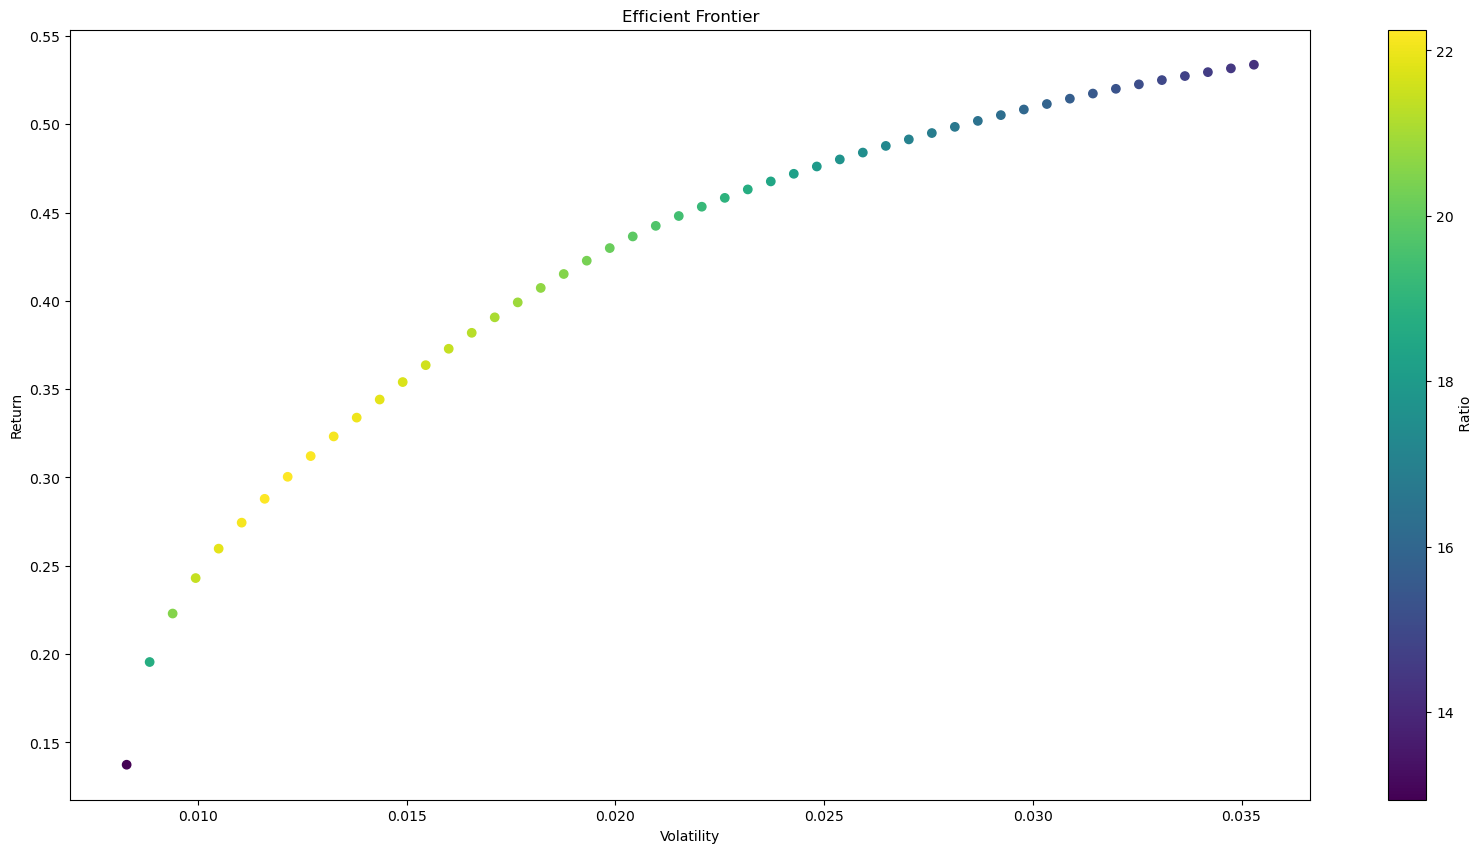

In [17]:
# Define the new objective function to maximize return (minimize negative return)
def negative_portfolio_return(weights):
    return -ret(r, weights)  # We use the previously defined ret function

# Initialize arrays to store portfolio returns, volatilities, and weights
num_ports = 50
all_weights = np.zeros((num_ports, num_assets))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)

# Calculate the gap between portfolio volatilities for equally spaced portfolios
vol_min = portfolio_volatility(w_min)
vol_max = portfolio_volatility(w_max)
gap = (vol_max - vol_min) / (num_ports)

# Loop through to generate portfolios with increasing risk and maximizing return
for i in range(num_ports):
    target_vol = vol_min + i * gap

    # Constraint to ensure sum of weights is 1 and to fix the portfolio volatility
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                    {'type': 'ineq', 'fun': lambda weights: target_vol - portfolio_volatility(weights)}]  # Volatility not more than target
    bounds = Bounds(0, 1)

    #Find the optimum results
    result = minimize(negative_portfolio_return,initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    # Storing the results
    all_weights[i, :] = result.x
    ret_arr[i] = ret(r, result.x)
    vol_arr[i] = target_vol
 

# Calculate Sharpe ratios for each portfolio
# assumed to be 0.03
sharpe_arr = (ret_arr-0.03)/ vol_arr

# Plotting the Efficient Frontier
plt.figure(figsize=(20, 10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label=' Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()


Finding the portfolio for a risk value of 1%

In [10]:
#Sum of weights must be 1 and the risk must be less than 1%
constraint = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
            {'type': 'ineq', 'fun': lambda weights: 0.01 - portfolio_volatility(weights)}]
                         

#Weights are between 0 and 1
bounds = tuple((0, 1) for _ in range(num_assets))

initial_weights = np.ones(num_assets) / num_assets

# Perform MVO optimization
result = minimize(negative_portfolio_returns, initial_weights, method='SLSQP', bounds=bounds, constraints=constraint)


#Find the weights
w_allocation = result.x

# Print the optimal weights and corresponding return and risk
print("Optimal Weights:")
print(w_allocation)
print("Return: %.2f%%" % (ret(r, w_allocation) * 100), "Risk: %.3f" % portfolio_volatility(w_allocation))

Optimal Weights:
[0.00000000e+00 2.09544196e-02 7.84898783e-02 1.80971490e-16
 1.98049703e-17 0.00000000e+00 8.88221397e-17 0.00000000e+00
 7.48365685e-17 2.64890651e-16 0.00000000e+00 7.10409187e-17
 2.67390150e-17 0.00000000e+00 1.10209203e-16 2.42095001e-16
 0.00000000e+00 4.82118422e-17 1.57844489e-16 0.00000000e+00
 1.89255554e-16 0.00000000e+00 4.28958137e-17 0.00000000e+00
 1.59696029e-16 3.78597429e-02 4.56222757e-17 2.33626742e-18
 4.41748253e-16 3.78062116e-17 0.00000000e+00 5.45888282e-17
 0.00000000e+00 1.10707665e-16 1.33731252e-16 5.89937936e-02
 4.55131568e-17 0.00000000e+00 5.82924411e-02 2.46239756e-16
 4.77312041e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.08848427e-16 1.20728522e-16 0.00000000e+00
 1.50623482e-18 2.65249792e-18 9.97757637e-17 0.00000000e+00
 1.04698210e-16 0.00000000e+00 0.00000000e+00 1.25572325e-16
 3.23055996e-16 1.95219731e-16 1.25923296e-16 1.86485902e-16
 2.42345001e-17 8.70179334e-02 0.00000000e+00 0.00000000e+00
 0.0000

Creating the asset allocation chart

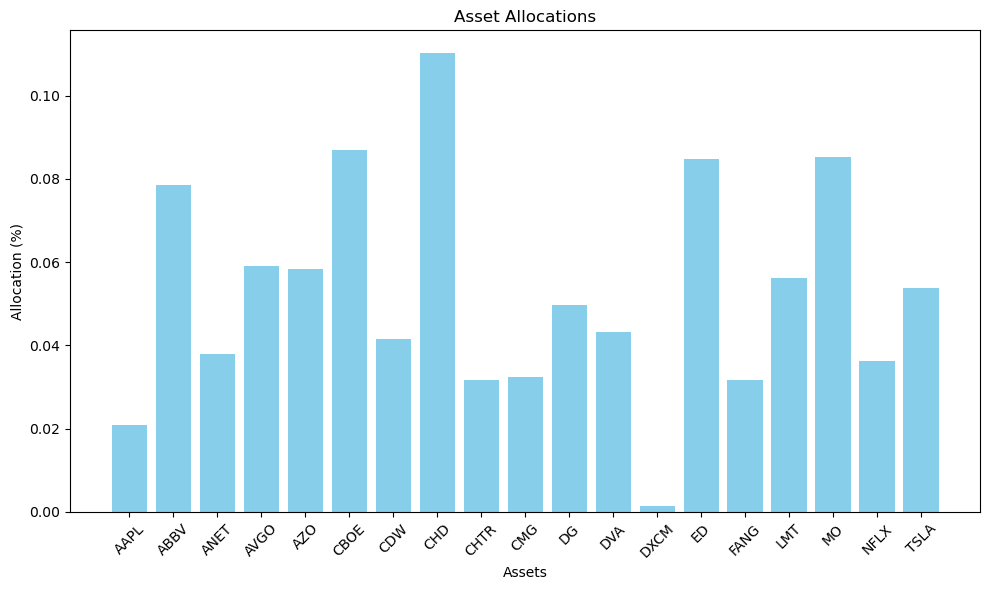

In [11]:
column_names = df.columns.tolist()

# Filter the weights and corresponding names for weights > 0
filtered_weights = [w for w in w_allocation if w > 0.001]
filtered_names = [column_names[i] for i, w in enumerate(w_allocation) if w > 0.001]
# Plotting the bar chart
plt.figure(figsize=(10, 6)) 
plt.bar(filtered_names, filtered_weights, color='skyblue') 
plt.xlabel('Assets')  # Adding x-label
plt.ylabel('Allocation (%)')  # Adding y-label
plt.title('Asset Allocations')  # Adding title
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability if names are long
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

Creating the correlation heatmap

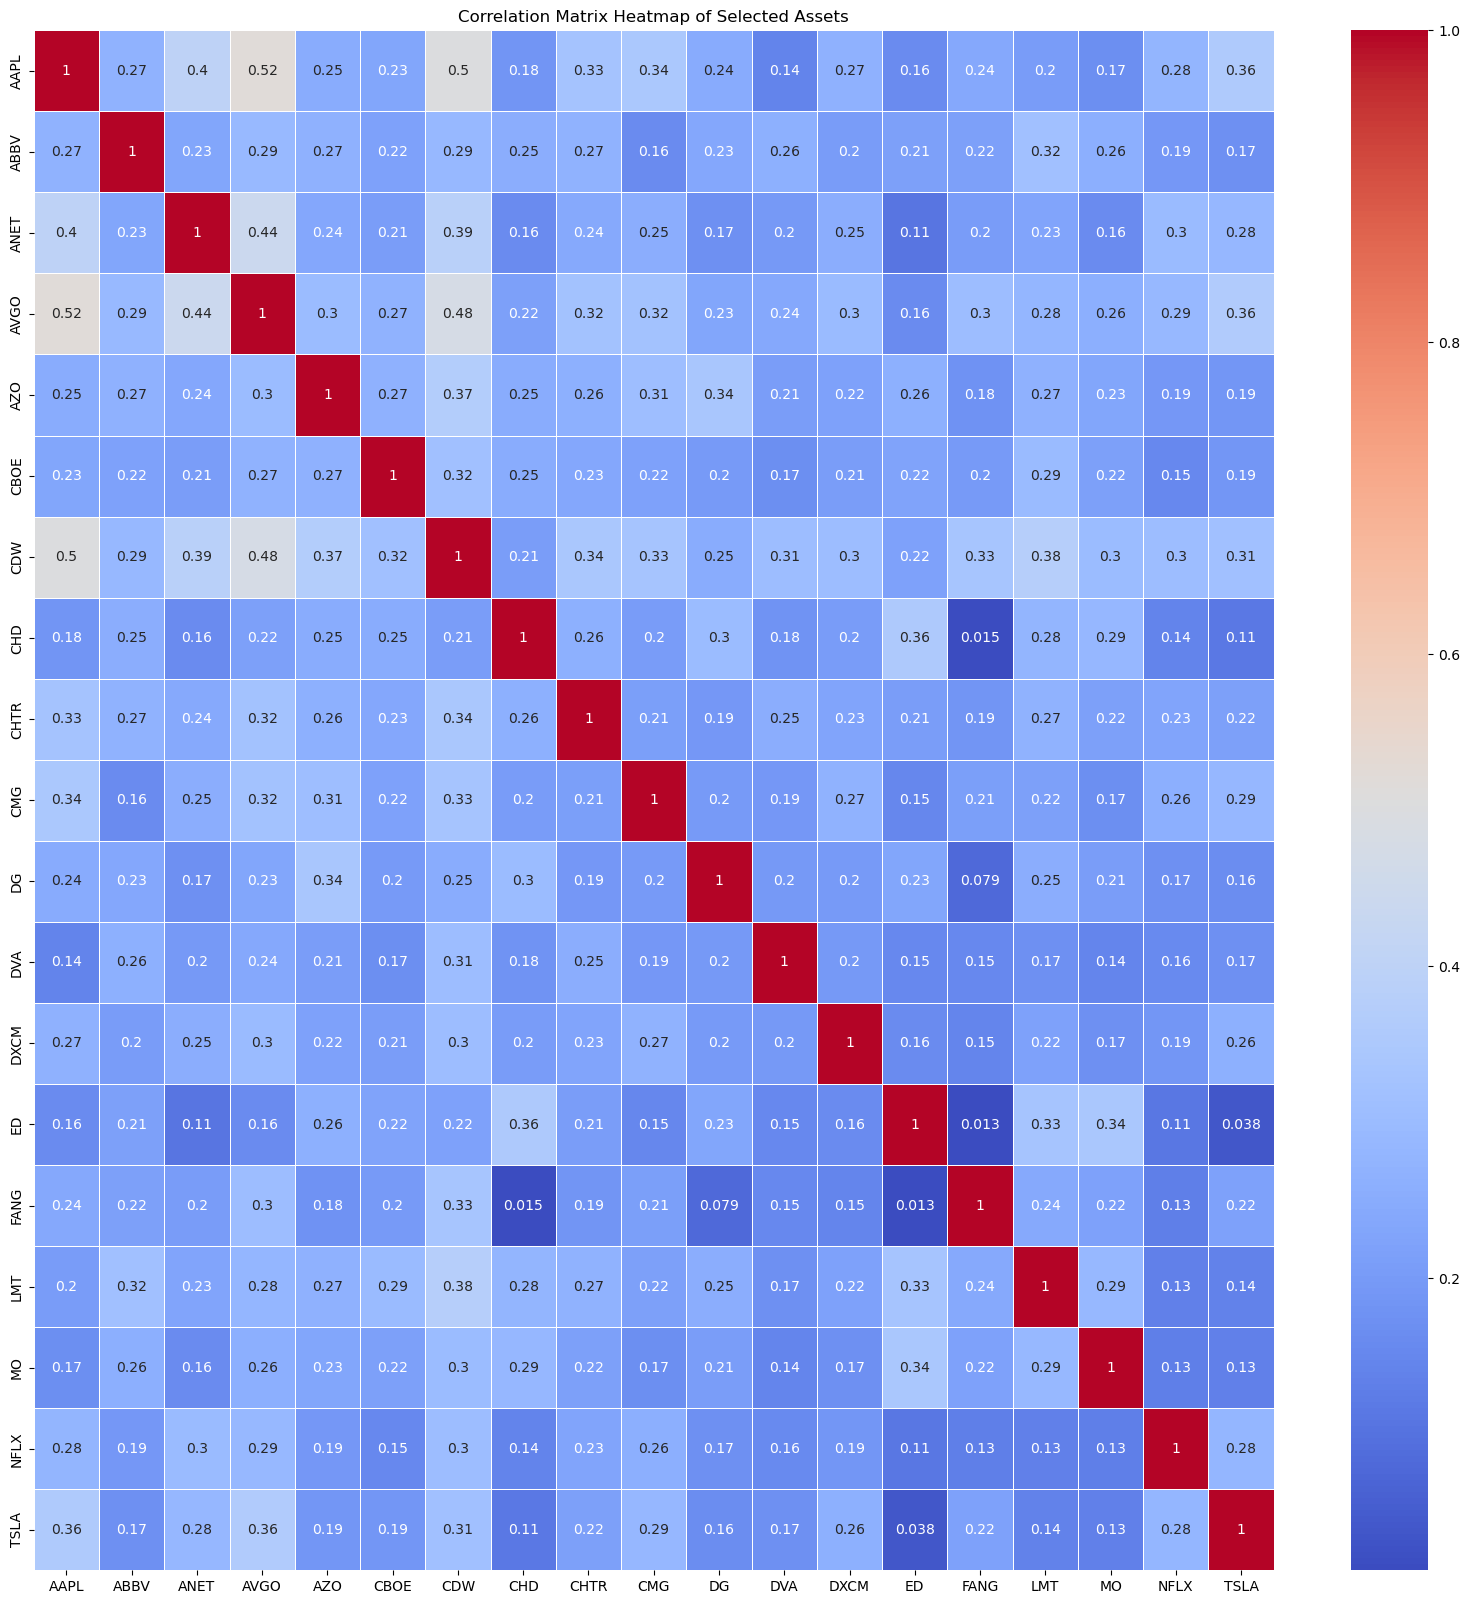

In [12]:
# Filter columns in df where the corresponding weight in w_min is greater than 0
filtered_df = df[filtered_names]

# Compute the correlation matrix
corr_matrix = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap of Selected Assets')
plt.show()


Now let us create a dataframe of results

In [13]:
#Get the values
returns = ret(r, w_allocation) * 100
risk = portfolio_volatility(w_allocation)*100

# Append the values to the DataFrame
new_row = pd.DataFrame({'return': [returns], 'risk': [risk]})

#Save the dataframe
new_row.to_excel("Vanilla_Results.xlsx",index=False)